# Classification Predict : Climate Change Belief Analysis

<h2><center> Team_7:</center></h2>
 
<center>- Kwenadi Letsoalo
<center>- Rinae Tshivhidzo
<center>- Kgotso Phela
<center>- Matome Peta
<center>- Rookaya Madari


<img src="https://github.com/Rinae-D/classification-predict-streamlit-template/blob/master/Climate_Action_Poster.png?raw=1" width="1500">

##  Introduction

Climate change is the long-term shift in global or regional temperature and typical weather patterns. These shifts may be natural but the cause of current climate change is largely human activity, like burning fossil fuels, such as natural gas, oil, and coal. Burning these materials releases what are called greenhouse gases into Earth’s atmosphere. There, these gases trap heat from the sun’s rays inside the atmosphere causing Earth’s average temperature to rise. However,recently many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. 

### Problem statement 

With that being said, they would like to determine how people perceive climate change and whether or not they positive it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

### Main Objective

To creat a Machine Learning model that is able to classify whether or not a person positives in climate change, based on their  tweet data.

### Data Information <br>
The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

Sentiments: <br>
 1:   The tweet supports the belief of man-made climate change <br>
-1:   The tweet does not positive in man-made climate change <br>
 0:   The tweet neither supports nor refutes the belief of man-made climate change <br>
 2:   The tweet links to factual news about climate change

 Sentiment: Sentiment of tweet message <br>
 Tweet body tweetid: Twitter unique id



## Overview


1. Import libraries
2. Loading data
3. EDA
4. Text cleaning
5. Feature engineering 
6. Modeling
7. model performance 
8. Hyperparameter tunning 
9. Conclusion

In [1]:
!pip install comet_ml

     |████████████████████████████████| 308 kB 5.0 MB/s 
     |████████████████████████████████| 546 kB 20.0 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 
     |████████████████████████████████| 53 kB 1.5 MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-py3-none-any.whl size=34546 sha256=bc0e49cb293551eaf411466dd20022da8bc888c3fa1559edb8962f22fa8b68ce
  Stored in directory: /root/.cache/pip/wheels/0d/c4/19/13d74440f2a571841db6b6e0a273694327498884dafb9cf978
Successfully built configobj


In [2]:
# import comet_ml 
from comet_ml import Experiment
# Create an experiment with your api key
experiment = Experiment(
    api_key="Nd4AKAoldK333oDpPBGegH3wD",
    project_name="general",
    workspace="rinae-d",
)



COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/rinae-d/general/79abaf0551494f8b8fe14ab2b9534c4d



### 1. Importing neccessary libraries

In [3]:
# downloads
#!pip install parfit
!pip install scikit-plot
#!pip install contractions

# imports for Natural Language  Processing
import pandas as pd
import numpy as np
import nltk
import string
import re
from sklearn.pipeline import Pipeline
import pickle

# feature extractioin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Preprocessing
#import contractions
from collections import Counter
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split

# classification models
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter tunning methods
#import parfit.parfit as pf
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

# metrics
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# imports for data visualisation
import seaborn as sns
from PIL import Image
from scipy import stats
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from sklearn.metrics import plot_roc_curve
from scikitplot.metrics import plot_roc, plot_confusion_matrix
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### 2. Loading the data

In [4]:
train = pd.read_csv('https://raw.githubusercontent.com/Rinae-D/classification-predict-streamlit-template/master/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Rinae-D/classification-predict-streamlit-template/master/test_with_no_labels.csv')

In [5]:
# Viewing the train data
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [6]:
# Viewing the test data
test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


### 3. Exploratory Data Analysis (EDA)

In [7]:
train_df = train.copy()
test_df = test.copy()

In [8]:
# Checking the information of the train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


We see we have 15819 tweets in the train dataframe, each labeled with a sentiment to see if they positive, deny or are neutral about climate change. And if the tweet is from news or media.

In [9]:
# Checking the information of the test data
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10546 entries, 0 to 10545
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  10546 non-null  object
 1   tweetid  10546 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


The test dataframe has 10546 tweets.

Both the train and test data have no missing values. 

#### Let us look at how many samples we have for each sentiment. 

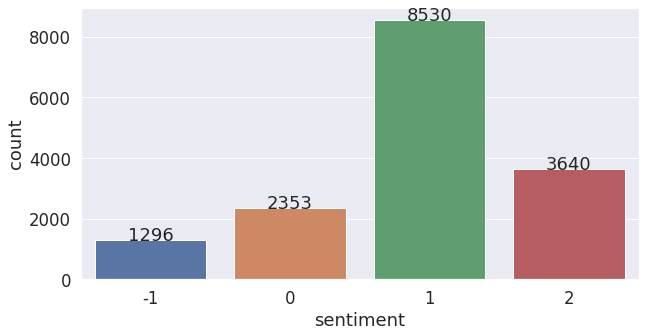

In [10]:
# Countplot for each sentiment
sns.set(font_scale=1.5)
fig, ax1 = plt.subplots(figsize=(10,5))
graph = sns.countplot(ax=ax1,x='sentiment', data=train_df)
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

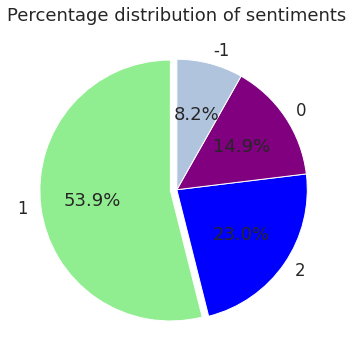

In [11]:
# checking the numerical distribution
fig1, ax1 = plt.subplots(figsize=(7, 6))
values = train_df['sentiment'].value_counts()/train_df.shape[0]
labels = (train_df['sentiment'].value_counts()/train_df.shape[0]).index
colors = ['lightgreen', 'blue', 'purple', 'lightsteelblue']
plt.pie(x=values, labels=labels, autopct='%1.1f%%', startangle=90, explode= (0.05, 0, 0, 0), colors=colors)
plt.title('Percentage distribution of sentiments')
plt.show()

We can see that there is a class imbalance. This tends to be a problem when training a model since the model will be able to train on more data for the majority class and less data for minority class. We will handle this problem as we continue with EDA.  Most of the tweets are from Pro climate change believers followed by news tweets.

 ### Extract urls and mentions
 
Returns a DataFrame with three additional columns, "hashtags", "users", "url" and "RT"


In [12]:

def extractor(df):
  
    # Extract hashtags
    tweets = df['message']
    df['hashtags'] = df.message. str.lower().str.findall(r'#.*?(?=\s|$)')
    htags = df['hashtags']
    df['hashtags'] = htags.apply(lambda x: np.nan if len(x) == 0 else x)
    
    # Extract users
    df['users'] = df.message. str.lower().str.findall(r'@\w*')
    mtags = df['users']
    df['users'] = mtags.apply(lambda x: np.nan if len(x) == 0 else x)
    
    # Extract url
    df['url'] = df.message. str.lower().str.findall(r'http\S+|www.\S+')
    urltags = df['url']
    df['url'] = urltags.apply(lambda x: np.nan if len(x) == 0 else x)
    
    return df

In [13]:
extractor(train_df)  

,sentiment,message,tweetid,hashtags,users,url
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN,[@mashable],[https://t.co/yelvcefxkc]
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN,NaN,NaN
2,2,RT @RawStory: Researchers say we have three ye...,698562,NaN,[@rawstory],"[https://t.co/wdt0kdur2f, https://t.co/z0anpt…]"
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,[#todayinmaker#],NaN,[https://t.co/44wotxtlcd]
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,[#electionnight],[@soynoviodetodas],NaN
...,...,...,...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001,NaN,[@ezlusztig],[https://…]
15815,2,RT @washingtonpost: How climate change could b...,17856,NaN,[@washingtonpost],[https://t.co/rpfgvb2plq]
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248,NaN,NaN,[https://t.co/0mp2]
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732,[#agenda2030.],[@sara8smiles],NaN


### Density plot for each sentiment

Text(0, 0.5, 'Density')

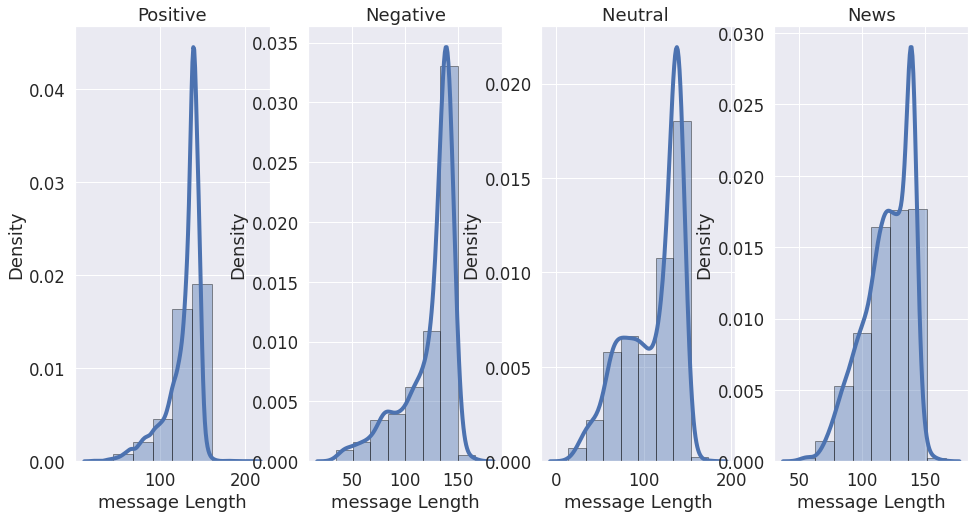

In [14]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,8))

#For  positive
sns.distplot(train_df[train_df['sentiment']==1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), 
             ax = ax1,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax1.set_title('Positive')
ax1.set_xlabel('message Length')
ax1.set_ylabel('Density')

#For Negative 
sns.distplot(train_df[train_df['sentiment']==-1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), 
             ax = ax2,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax2.set_title('Negative')
ax2.set_xlabel('message Length')
ax2.set_ylabel('Density')

#For Neutral 
sns.distplot(train_df[train_df['sentiment']==0]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25),  
             ax = ax3,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax3.set_title('Neutral ')
ax3.set_xlabel('message Length')
ax3.set_ylabel('Density')

#For Neews
sns.distplot(train_df[train_df['sentiment']==2]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25),  
             ax = ax4,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax4.set_title('News')
ax4.set_xlabel('message Length')
ax4.set_ylabel('Density')

Comparing the length of messages using characters it can be seen that  the average length of messages for all sentiments is approximately 140. 

### Checking for the most popular hashtags and users


In [15]:
# Splitting the df into its sentiments

negative = train_df[train_df.sentiment == -1]
positive = train_df[train_df.sentiment == 1]
news = train_df[train_df.sentiment == 2]
neutral = train_df[train_df.sentiment == 0]

# Extracting words which start with a hashtag
negative_hashtags = negative.message.str.extractall(r'(\#\w+)')[0].value_counts().sort_values(ascending=True).tail(20)
positive_hashtags = positive.message.str.extractall(r'(\#\w+)')[0].value_counts().sort_values(ascending=True).tail(20)
news_hashtags = news.message.str.extractall(r'(\#\w+)')[0].value_counts().sort_values(ascending=True).tail(20)
neutral_hashtags = neutral.message.str.extractall(r'(\#\w+)')[0].value_counts().sort_values(ascending=True).tail(20)

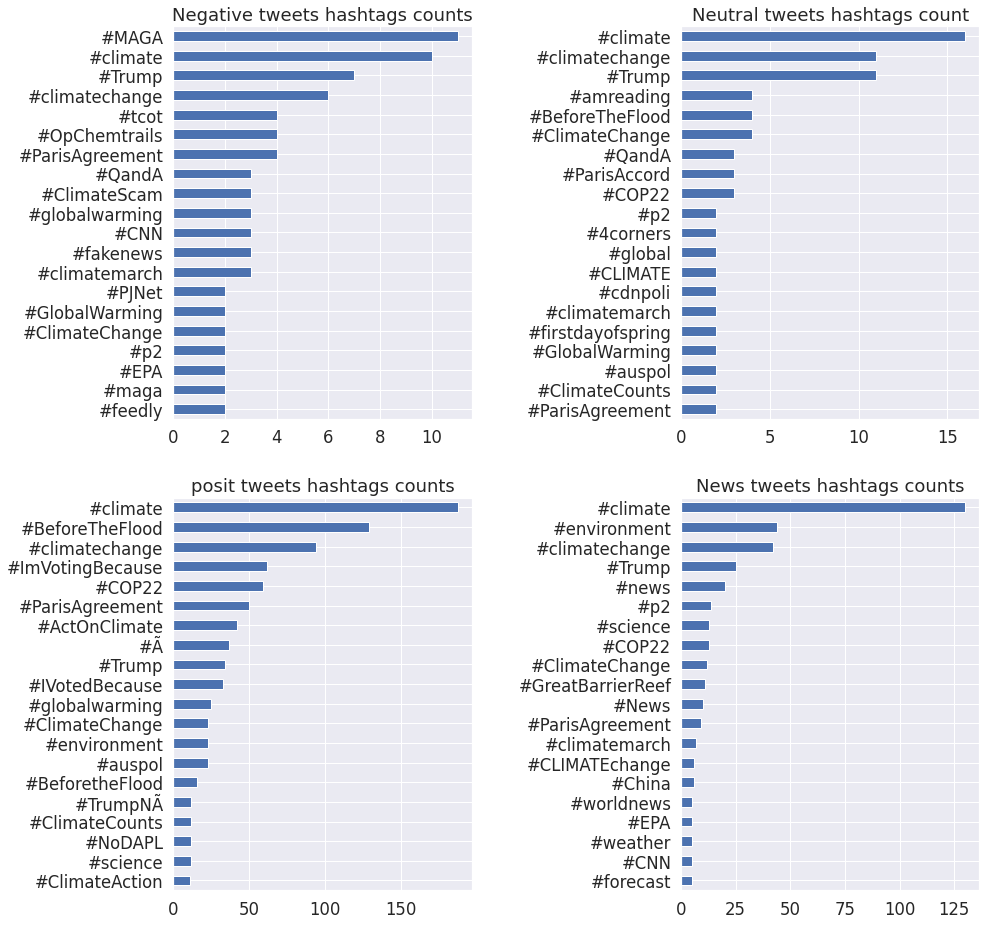

In [16]:
#Get the first 20 most common from each sentiment
#non_positivers_hashtags_counts = non_positivers_hashtags.sort_values(ascending=True).tail(20)
#positive_hashtags_counts = non_positivers_hashtags.sort_values(ascending=True).tail(20)
#news_hashtags_counts = news_hashtags.sort_values(ascending=True).tail(20)
#neutral_hashtags_count = neutral_hashtags.sort_values(ascending=True).tail(20)



#plot figures
fig.suptitle('20 most common hastags for each sentiments')

plt.subplot(2,2,1) 
negative_hashtags.plot(figsize=(14,15), kind='barh')
plt.title("Negative tweets hashtags counts")
plt.rcParams.update({'font.size': 5})

plt.subplot(2, 2, 2) 
neutral_hashtags.plot(figsize=(14,15), kind='barh')
plt.title("Neutral tweets hashtags count")

plt.subplot(2, 2, 3)
positive_hashtags.plot(figsize=(14,15), kind='barh')
plt.title("posit tweets hashtags counts")

plt.subplot(2, 2, 4) 
news_hashtags.plot(figsize=(14,15), kind='barh')
plt.title("News tweets hashtags counts")


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.2)
plt.show()

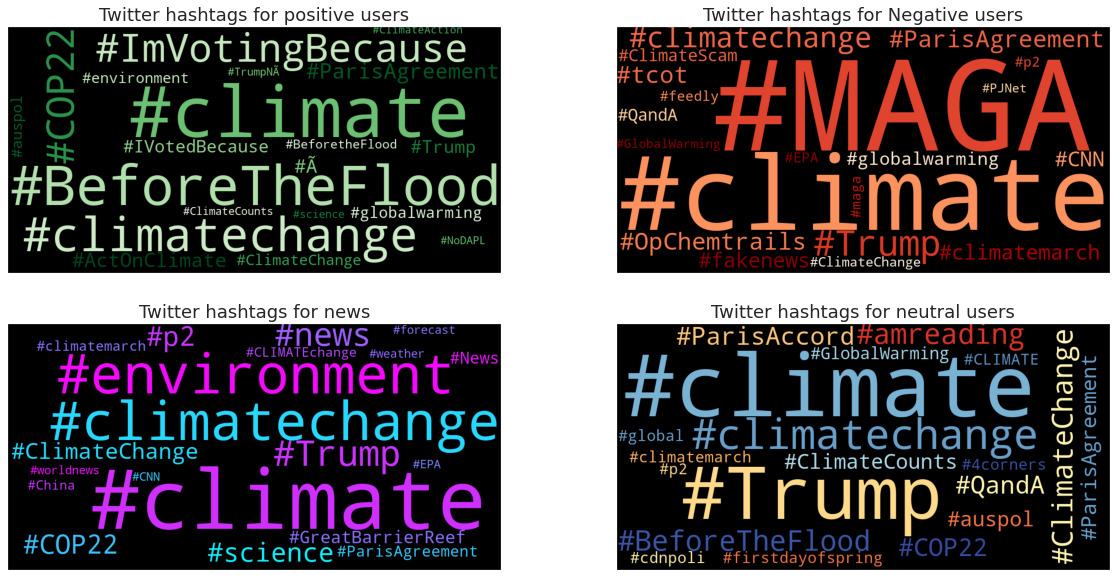

In [17]:
from wordcloud import WordCloud


wordcloud1 = WordCloud(width = 1000, 
                       height = 500, 
                      colormap="Greens_r", 
                       background_color="black").generate_from_frequencies(positive_hashtags.to_dict())
wordcloud2 = WordCloud(width = 1000, 
                       height = 500, 
                      # mask = tweet_mask,
                      colormap="OrRd_r", 
                       background_color="black").generate_from_frequencies(negative_hashtags.to_dict())
wordcloud3 = WordCloud(width = 1000, 
                       height = 500, 
                       #mask = tweet_mask,
                      colormap="cool_r", 
                       background_color="black").generate_from_frequencies(news_hashtags.to_dict())
wordcloud4 = WordCloud(width = 1000, 
                       height = 500, 
                       #mask = tweet_mask,
                      colormap="RdYlBu", 
                       background_color="black").generate_from_frequencies(neutral_hashtags.to_dict())


titles=['Twitter hashtags for positive users',
        'Twitter hashtags for Negative users',
        'Twitter hashtags for news',
        'Twitter hashtags for neutral users']
images=[wordcloud1, wordcloud2, wordcloud3 ,wordcloud4]

fig, ax = plt.subplots(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
  
plt.show()

The wordclouds above seem to have common texts used among all the sentiments.  The most common texts used include climate Change, climate and Trump.

In [18]:
# Looking at Counts of the most popular users
counts=train_df.users.value_counts()

In [19]:
df_counts=pd.DataFrame(counts,columns=['users'])

In [20]:
df_counts = df_counts.reset_index()
df_counts.columns = ['users', 'counts']

In [21]:
df_counts.head()

,users,counts
0,[@stephenschlegel],307
1,[@sensanders],243
2,[@realdonaldtrump],143
3,[@berniesanders],121
4,[@cnn],106


We can see that @stephen Schlegel is the most popular user with 307 messages followed by sen sanders with 243 messages.

Now we look at popular users for each sentiment

In [22]:
####### Extracting users
negative_users = negative.message.str.extractall(r'(\@\w+)')[0].value_counts().sort_values(ascending=True).tail(20)
positive_users=positive.message.str.extractall(r'(\@\w+)')[0].value_counts().sort_values(ascending=True).tail(20)
news_users = news.message.str.extractall(r'(\@\w+)')[0].value_counts().sort_values(ascending=True).tail(20)
neutral_users = neutral.message.str.extractall(r'(\@\w+)')[0].value_counts().sort_values(ascending=True).tail(20)

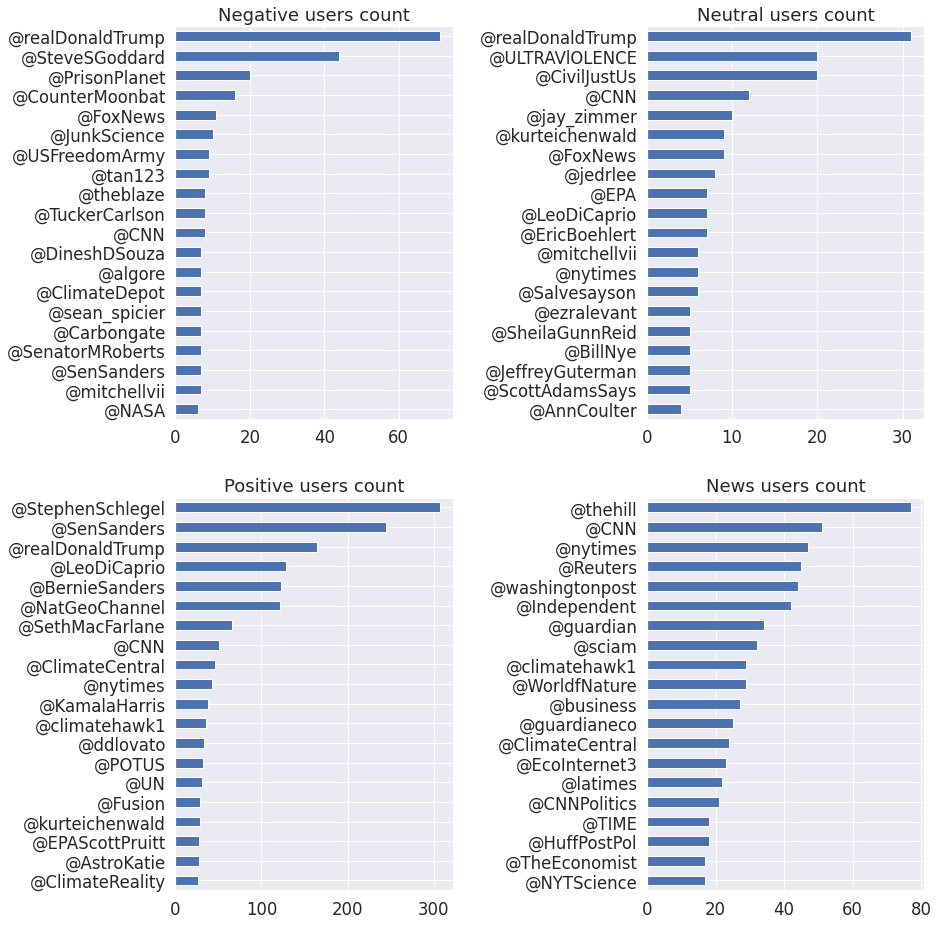

In [23]:
#plot figures
fig.suptitle('20 Most Common users for each Sentiments', fontsize=16)

plt.subplot(2,2,1) 
negative_users.plot(figsize=(13,15), kind='barh')
plt.title("Negative users count")

plt.subplot(2, 2, 2) 
neutral_users.plot(figsize=(13,15), kind='barh')
plt.title("Neutral users count")

plt.subplot(2, 2, 3) 
positive_users.plot(figsize=(13,15), kind='barh')
plt.title("Positive users count")

plt.subplot(2, 2, 4) 
news_users.plot(figsize=(13,15), kind='barh')
plt.title("News users count")
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.7, 
                    hspace=0.2)
plt.show()

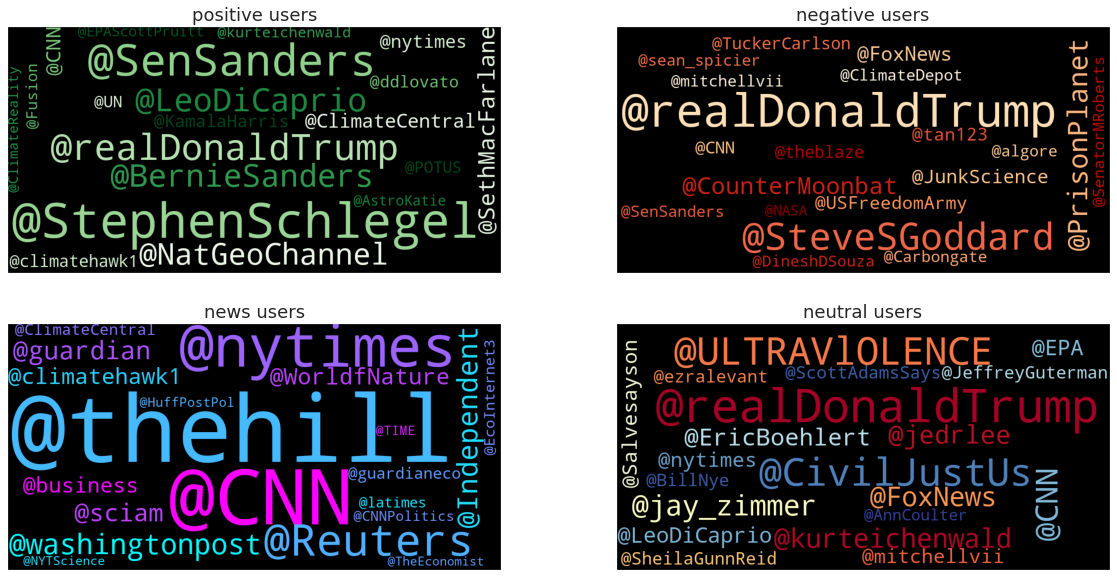

In [24]:
wordcloud1 = WordCloud(width = 1000, 
                       height = 500, 
                      colormap="Greens_r", 
                       background_color="black").generate_from_frequencies(positive_users.to_dict())
wordcloud2 = WordCloud(width = 1000, 
                       height = 500, 
                      colormap="OrRd_r", 
                       background_color="black").generate_from_frequencies(negative_users.to_dict())
wordcloud3 = WordCloud(width = 1000, 
                       height = 500, 
                      colormap="cool_r", 
                       background_color="black").generate_from_frequencies(news_users.to_dict())
wordcloud4 = WordCloud(width = 1000, 
                       height = 500, 
                      colormap="RdYlBu", 
                       background_color="black").generate_from_frequencies(neutral_users.to_dict())


titles=['positive users',
        'negative users',
        'news users',
        'neutral users']
images=[wordcloud1, wordcloud2, wordcloud3 ,wordcloud4]

fig, ax = plt.subplots(figsize=(20,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
  
plt.show()

Stephen Schlegel has the most number of positive hashtags with approximately 300 hashtages. The most number of negative hashtags are from Donald Trump, with approximately  50 hashtags.
The most number of news tags were from The Hill news, with approximately 70 hashtags.
Donald Trump was the user that appeared in almost all the sentiments.

## Solving imbalanced data problem

To solve the imbalanced data problem we use random oversampling. Random oversampling uses synthetic techniques to increase the number of minority class samples to equal the number of majority class samples. 

In [25]:
from sklearn.utils import resample
maj = train_df[train_df['sentiment']==1] 
mino_1 =train_df[train_df['sentiment']==0] 
mino_2 = train_df[train_df['sentiment']==-1] 
mino_3 = train_df[train_df['sentiment']==2] 

mino_1 = resample(mino_1, replace=True, n_samples=8530, random_state=47)      
mino_2 = resample(mino_2, replace=True, n_samples=8530, random_state=47)   
mino_3= resample(mino_3, replace=True, n_samples=8530, random_state=47)  

###combining all oversampled classes into a single df
train_df = pd.concat([maj, mino_1, mino_2, mino_3])


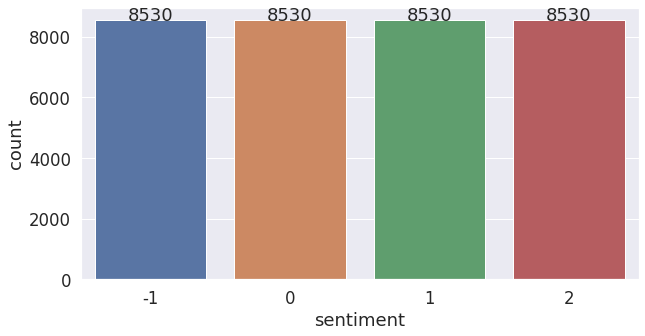

In [26]:
#countplot after oversampling
sns.set(font_scale=1.5)
fig, ax1 = plt.subplots(figsize=(10,5))
graph = sns.countplot(ax=ax1,x='sentiment', data=train_df)
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

From the plot above we can see that all the class now have equal number of samples

### 4.Text cleaning

#### Remove noise 

We remove unneccesary information  such as urls,mentions, hashtags and RT.

In [27]:
def remove_noise(df):
    # Remove URLs
    df['message'] = df['message'].str.replace('http\S+|www.\S+', '', case=False)

    # Remove mentions
    df['message'] = df['message'].str.replace('@\w*', '', case=False)

    # Removal hashtags
    df['message'] = df['message'].str.replace('#.*?(?=\s|$)', '', case=False)

    # Remove 'RT'
    df['message'] = df['message'].str.replace('RT', '', case=False)

    return df.head()
    

In [28]:
remove_noise(train_df)

,sentiment,message,tweetid,hashtags,users,url
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN,[@mashable],[https://t.co/yelvcefxkc]
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN,NaN,NaN
3,1,WIRED : 2016 was a pivotal year in the war on...,573736,[#todayinmaker#],NaN,[https://t.co/44wotxtlcd]
4,1,": It's 2016, and a racist, sexist, climate ch...",466954,[#electionnight],[@soynoviodetodas],NaN
5,1,Woh a read whether you do or don't believe in ...,425577,NaN,NaN,"[https://t.co/gglzvnyjun, https://t.co/7afe2ma..."


  ### Remove punctuation and tokenise the text
  We create a function that cleans the tweets by tokenizing, removing punctuation, removing digits and removing 1 character tokens.

In [29]:
# Clean tweets
def clean_tweets(df):
  
    # tokenizing the tweets
    clean_tweets = df['message'].apply(TweetTokenizer().tokenize) ## first we tokenize

    # remove punctuation
    clean_tweets = clean_tweets.apply(lambda x : [token for token in x if token not in string.punctuation])

    # removing digits from the tweets
    clean_tweets = clean_tweets.apply(lambda x: [token for token in x if token not in list(string.digits)])

    # lastly we remove all one character tokens
    clean_tweets = clean_tweets.apply(lambda x: [token for token in x if len(token) > 1])
    
    df['cleaned_tweets'] = clean_tweets
    
    return df['cleaned_tweets']

In [30]:
clean_tweets(train_df)

0        [PolySciMajor, EPA, chief, doesn't, think, car...
1        [It's, not, like, we, lack, evidence, of, anth...
3        [WIRED, 2016, was, pivotal, year, in, the, war...
4        [It's, 2016, and, racist, sexist, climate, cha...
5        [Woh, read, whether, you, do, or, don't, belie...
                               ...                        
5208     [New, York, hotels, join, fight, against, clim...
14310    [Donald, Trump, won't, discuss, climate, chang...
5502     [Scientists, gather, to, discuss, whether, hum...
15787    [China, raises, hopes, for, continued, climate...
2049     [Scientists, disprove, there, was, hiatus, in,...
Name: cleaned_tweets, Length: 34120, dtype: object

#### Removing Stopwords

In [31]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')

# Convert to lower case
train_df['cleaned_tweets'] = train_df['cleaned_tweets'].apply(lambda x: [word.lower() for word in x])

# Remove stopwords
train_df['no_stopwords'] = train_df['cleaned_tweets'].apply(lambda x: [item for item in x if item not in stop])

train_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,sentiment,message,tweetid,hashtags,users,url,cleaned_tweets,no_stopwords
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN,[@mashable],[https://t.co/yelvcefxkc],"[polyscimajor, epa, chief, doesn't, think, car...","[polyscimajor, epa, chief, think, carbon, diox..."
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN,NaN,NaN,"[it's, not, like, we, lack, evidence, of, anth...","[like, lack, evidence, anthropogenic, global, ..."
3,1,WIRED : 2016 was a pivotal year in the war on...,573736,[#todayinmaker#],NaN,[https://t.co/44wotxtlcd],"[wired, 2016, was, pivotal, year, in, the, war...","[wired, 2016, pivotal, year, war, climate, cha..."
4,1,": It's 2016, and a racist, sexist, climate ch...",466954,[#electionnight],[@soynoviodetodas],NaN,"[it's, 2016, and, racist, sexist, climate, cha...","[2016, racist, sexist, climate, change, denyin..."
5,1,Woh a read whether you do or don't believe in ...,425577,NaN,NaN,"[https://t.co/gglzvnyjun, https://t.co/7afe2ma...","[woh, read, whether, you, do, or, don't, belie...","[woh, read, whether, believe, climate, change]"


**Most Frequent Words**

In [32]:
from collections import Counter
cnt = Counter()
for message in train_df['no_stopwords'].values:
    for word in message:
        cnt[word] += 1
        
#cnt.most_common()

**Mapping the Sentiment class by name**

In [33]:
train_df['sent_labels']  = train_df['sentiment'].map({-1: 'Anti',0:'Neutral', 1:'Pro', 2:'News'})
train_df.head()

,sentiment,message,tweetid,hashtags,users,url,cleaned_tweets,no_stopwords,sent_labels
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN,[@mashable],[https://t.co/yelvcefxkc],"[polyscimajor, epa, chief, doesn't, think, car...","[polyscimajor, epa, chief, think, carbon, diox...",Pro
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN,NaN,NaN,"[it's, not, like, we, lack, evidence, of, anth...","[like, lack, evidence, anthropogenic, global, ...",Pro
3,1,WIRED : 2016 was a pivotal year in the war on...,573736,[#todayinmaker#],NaN,[https://t.co/44wotxtlcd],"[wired, 2016, was, pivotal, year, in, the, war...","[wired, 2016, pivotal, year, war, climate, cha...",Pro
4,1,": It's 2016, and a racist, sexist, climate ch...",466954,[#electionnight],[@soynoviodetodas],NaN,"[it's, 2016, and, racist, sexist, climate, cha...","[2016, racist, sexist, climate, change, denyin...",Pro
5,1,Woh a read whether you do or don't believe in ...,425577,NaN,NaN,"[https://t.co/gglzvnyjun, https://t.co/7afe2ma...","[woh, read, whether, you, do, or, don't, belie...","[woh, read, whether, believe, climate, change]",Pro


**Get the length of each raw tweet**

In [34]:
train_df['text_length'] = train_df['message'].apply(lambda x: len(x))

**Separate Dataframes of tweets for each sentiment**

In [35]:
# Dataframe for neutral tweets
neutral_df = train_df[train_df['sentiment'] == 0]
neutral_df.head()

,sentiment,message,tweetid,hashtags,users,url,cleaned_tweets,no_stopwords,sent_labels,text_length
7661,0,When climate change makes the weather more,269324,NaN,NaN,NaN,"[when, climate, change, makes, the, weather, m...","[climate, change, makes, weather]",Neutral,42
12893,0,It doesn't surprise me given the same in stan...,287832,NaN,[@ppact],NaN,"[it, doesn't, surprise, me, given, the, same, ...","[surprise, given, stance, climate, change, sci...",Neutral,78
4524,0,National GeographicÃ¢â‚¬â„¢s climate change do...,544614,NaN,[@thenextweb],[https://t.co/1y3koz4kdy],"[national, geographicã, climate, change, docum...","[national, geographicã, climate, change, docum...",Neutral,102
5110,0,RBReich: I'm often told that climate change is...,639904,NaN,NaN,[https://t.co/mo14qf6zbl],"[rbreich, i'm, often, told, that, climate, cha...","[rbreich, i'm, often, told, climate, change, m...",Neutral,122
14124,0,": Notice that climate change, not racism, sex...",625623,NaN,[@russian_starr],[https://t.co/yunl…],"[notice, that, climate, change, not, racism, s...","[notice, climate, change, racism, sexism, homo...",Neutral,106


In [36]:
# Dataframe for pro tweets
pro_df = train_df[train_df['sentiment'] == 1]
pro_df.head()

,sentiment,message,tweetid,hashtags,users,url,cleaned_tweets,no_stopwords,sent_labels,text_length
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN,[@mashable],[https://t.co/yelvcefxkc],"[polyscimajor, epa, chief, doesn't, think, car...","[polyscimajor, epa, chief, think, carbon, diox...",Pro,108
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN,NaN,NaN,"[it's, not, like, we, lack, evidence, of, anth...","[like, lack, evidence, anthropogenic, global, ...",Pro,62
3,1,WIRED : 2016 was a pivotal year in the war on...,573736,[#todayinmaker#],NaN,[https://t.co/44wotxtlcd],"[wired, 2016, was, pivotal, year, in, the, war...","[wired, 2016, pivotal, year, war, climate, cha...",Pro,62
4,1,": It's 2016, and a racist, sexist, climate ch...",466954,[#electionnight],[@soynoviodetodas],NaN,"[it's, 2016, and, racist, sexist, climate, cha...","[2016, racist, sexist, climate, change, denyin...",Pro,90
5,1,Woh a read whether you do or don't believe in ...,425577,NaN,NaN,"[https://t.co/gglzvnyjun, https://t.co/7afe2ma...","[woh, read, whether, you, do, or, don't, belie...","[woh, read, whether, believe, climate, change]",Pro,62


In [37]:
# DtataFrame for anti tweets
anti_df = train_df[train_df['sentiment'] == -1]
anti_df.head()

,sentiment,message,tweetid,hashtags,users,url,cleaned_tweets,no_stopwords,sent_labels,text_length
14149,-1,This is good since President Elect Trump does ...,714891,NaN,NaN,[https://t.co/8dw7pgjfyl],"[this, is, good, since, president, elect, trum...","[good, since, president, elect, trump, believe...",Anti,123
4028,-1,At least Leo finally admits what we've all k...,806625,NaN,"[@tan123, @scotclimate]",NaN,"[at, least, leo, finally, admits, what, we've,...","[least, leo, finally, admits, we've, known, .....",Anti,96
15688,-1,". No no no. Come on Swinney, Democrats invent...",528738,NaN,"[@bswinneyscout, @tysonkfan]",NaN,"[no, no, no, come, on, swinney, democrats, inv...","[come, swinney, democrats, invented, global, w...",Anti,114
7283,-1,There has been no statistically significant gl...,930214,[#climate],NaN,NaN,"[there, has, been, no, statistically, signific...","[statistically, significant, global, warming, ...",Anti,78
8564,-1,The kids suing the government over climate cha...,432414,NaN,[@slate],NaN,"[the, kids, suing, the, government, over, clim...","[kids, suing, government, climate, change, bes...",Anti,133


In [38]:
# Dataframe for news tweets
news_df = train_df[train_df['sentiment'] == 2]
news_df.head()

,sentiment,message,tweetid,hashtags,users,url,cleaned_tweets,no_stopwords,sent_labels,text_length
4965,2,: Flights are getting bumpier. HereÃ¢â‚¬â„¢s ...,209366,[#climate],[@wef],"[https://t.co/t4rrxneckh, https://t.co/w5chvjb...","[flights, are, getting, bumpier, hereã, why, s...","[flights, getting, bumpier, hereã, scientists,...",News,82
8142,2,: The ocean is the planet's lifeblood. But it...,296866,NaN,[@theeconomist],[https://t.co/etpnj6vsjh],"[the, ocean, is, the, planet's, lifeblood, but...","[ocean, planet's, lifeblood, transformed, clim...",News,85
10222,2,"December 9th, 2016 Justin Trudeau reaches hist...",464796,NaN,NaN,NaN,"[december, 9th, 2016, justin, trudeau, reaches...","[december, 9th, 2016, justin, trudeau, reaches...",News,73
14507,2,: In New repo summarizes how climate change ...,208016,NaN,"[@waterwired, @physorg_com, @]",[https://t.co/u3wulvpjn8],"[in, new, repo, summarizes, how, climate, chan...","[new, repo, summarizes, climate, change, affec...",News,89
11362,2,Indigenous Latin American women craft climate ...,764469,[#cop22],NaN,[https://t.co/leliha3kdx],"[indigenous, latin, american, women, craft, cl...","[indigenous, latin, american, women, craft, cl...",News,77


In [39]:
train_df.head()

,sentiment,message,tweetid,hashtags,users,url,cleaned_tweets,no_stopwords,sent_labels,text_length
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,NaN,[@mashable],[https://t.co/yelvcefxkc],"[polyscimajor, epa, chief, doesn't, think, car...","[polyscimajor, epa, chief, think, carbon, diox...",Pro,108
1,1,It's not like we lack evidence of anthropogeni...,126103,NaN,NaN,NaN,"[it's, not, like, we, lack, evidence, of, anth...","[like, lack, evidence, anthropogenic, global, ...",Pro,62
3,1,WIRED : 2016 was a pivotal year in the war on...,573736,[#todayinmaker#],NaN,[https://t.co/44wotxtlcd],"[wired, 2016, was, pivotal, year, in, the, war...","[wired, 2016, pivotal, year, war, climate, cha...",Pro,62
4,1,": It's 2016, and a racist, sexist, climate ch...",466954,[#electionnight],[@soynoviodetodas],NaN,"[it's, 2016, and, racist, sexist, climate, cha...","[2016, racist, sexist, climate, change, denyin...",Pro,90
5,1,Woh a read whether you do or don't believe in ...,425577,NaN,NaN,"[https://t.co/gglzvnyjun, https://t.co/7afe2ma...","[woh, read, whether, you, do, or, don't, belie...","[woh, read, whether, believe, climate, change]",Pro,62


### 5. Feature Engineering


Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used to train our model.

In [40]:
train_fin = train.copy()
test_fin = test.copy()

In [41]:
# Part of Speech for modeling
def POS(word):
   """
   This function gets the part of speech
   """
   pos_counts = Counter()
   probable_part_of_speech = wordnet.synsets(word)
   pos_counts["n"] = len([i for i in probable_part_of_speech if i.pos()=="n"])
   pos_counts["v"] = len([i for i in probable_part_of_speech if i.pos()=="v"])
   pos_counts["a"] = len([i for i in probable_part_of_speech if i.pos()=="a"])
   pos_counts["r"] = len([i for i in probable_part_of_speech if i.pos()=="r"])
   part_of_speech = pos_counts.most_common(1)[0][0]
   return part_of_speech

In [42]:
nltk.download('all')
normalizer = WordNetLemmatizer()

def replace_sentiments(df):
    """
    replace keywords in the tweets  with associated sentiments
    
    'global' ----> 'negative'
    'climate' ----> 'positive'
    'MAGA'----> 'negative'
    'warm' -----> 'negative'
    'change' ------> 'negative'
    'realdonaltrump'----> 'negative'
    """
    df['message'] = df['message'].apply(lambda x: x.replace('global', 'negative'))
    df['message'] = df['message'].apply(lambda x: x.replace('climate', 'positive'))
    df['message'] = df['message'].apply(lambda x: x.replace('warm', 'negative')) 
    df['message'] = df['message'].apply(lambda x: x.replace('MAGA', 'negative'))
    df['message'] = df['message'].apply(lambda x: x.replace('change', 'negative')) 
    df['message'] = df['message'].apply(lambda x: x.replace('realdonaltrump', 'negative'))

    return df['message']

# replace sentiments
train_fin['clean_tweets'] = replace_sentiments(train_fin)
test_fin['clean_tweets'] = replace_sentiments(test_fin)

# cleaning tweets
train_fin['clean_tweets'] = clean_tweets(train_fin)
test_fin['clean_tweets'] = clean_tweets(test_fin)

# lemmatize
train_fin['clean_tweets'] = train_fin['clean_tweets'].apply(lambda x: [normalizer.lemmatize(token, POS(token)) for token in x])
test_fin['clean_tweets'] = test_fin['clean_tweets'].apply(lambda x: [normalizer.lemmatize(token, POS(token)) for token in x])

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

### 6. Modeling

#### separate the data into independent and dependent variables

In [43]:
X = train_fin['clean_tweets']
y = train_fin['sentiment']
X_test = test_fin['clean_tweets']

#### Spliting the data

In [44]:
# Splitting the data into 90% train and 10% validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state = 42)

In [45]:
X_train = list(X_train.apply(' '.join))
X_val = list(X_val.apply(' '.join))
X_test = list(X_test.apply(' '.join))

### Creating model Pipelines

In [46]:
# DecisionTreeClassifier Pipeline
tree_tfidf = Pipeline([('tfidf', TfidfVectorizer()),('tree', DecisionTreeClassifier()),])
tree_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('tree', DecisionTreeClassifier()),])


# RandomForestClassifier Pipeline
rfc_tfidf = Pipeline([('tfidf', TfidfVectorizer()), ('rfc', RandomForestClassifier())])
rfc_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('rfc', RandomForestClassifier()),])


# LinearSVC Pipeline
Lsvc_tfidf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('scv', LinearSVC()),])
Lsvc_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('svc', LinearSVC()),])



# Logistic Regression pipeline
logreg_tfidf = Pipeline([('tfidf', TfidfVectorizer()),('logistic', LogisticRegression()),])
logreg_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('logistic', LogisticRegression()),])



# SGD Classifier pipeline
SGD_tfidf = Pipeline([('tfidf', TfidfVectorizer()), ('SGD', SGDClassifier())])
SGD_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('SGD', SGDClassifier()),])




# Support Vector Classifier Pipeline
svc_tfidf = Pipeline([('tfidf', TfidfVectorizer()), ('SVC', SVC())])
svc_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('SVC', SVC()),])

# Ridge Classifier
ridge_tfidf = Pipeline([('tfidf', TfidfVectorizer()), ('Ridge', RidgeClassifier())])
ridge_count = Pipeline([('CountVec',  CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )),('Ridge', RidgeClassifier()),])

### Model training

In [47]:
# training the decision tree pipeline
tree_tfidf.fit(X_train, y_train)
tree_count.fit(X_train, y_train)

# training the RandomForest pipleline
rfc_tfidf.fit(X_train, y_train)
rfc_count.fit(X_train, y_train)

# training the LinearSVC pipeline
Lsvc_tfidf.fit(X_train, y_train)
Lsvc_count.fit(X_train, y_train)

# training the logistic regression pipeline
logreg_tfidf.fit(X_train, y_train)
logreg_count.fit(X_train, y_train)

# training the SGD Classifier
SGD_tfidf.fit(X_train, y_train)
SGD_count.fit(X_train, y_train)

# training the support vector classifier
svc_tfidf.fit(X_train, y_train)
svc_count.fit(X_train, y_train)

# training the Ridge classifier
ridge_tfidf.fit(X_train, y_train)
ridge_count.fit(X_train, y_train)

COMET ERROR: Failed to extract parameters from estimator
COMET ERROR: Failed to extract parameters from estimator


Pipeline(steps=[('CountVec',
                 CountVectorizer(max_features=180000, ngram_range=(1, 2))),
                ('Ridge', RidgeClassifier())])

#### Calculating average scores for the TFIDF vectoriser

In [48]:
tree_acc =  accuracy_score(y_val,tree_tfidf.predict(X_val))
rfc_acc = accuracy_score(y_val,rfc_tfidf.predict(X_val))
lsvc_acc = accuracy_score(y_val,Lsvc_tfidf.predict(X_val))
log_acc = accuracy_score(y_val, logreg_tfidf.predict(X_val))
sgd_acc = accuracy_score(y_val, SGD_tfidf.predict(X_val))
svc_acc = accuracy_score(y_val, svc_tfidf.predict(X_val))
ridge_acc = accuracy_score(y_val, ridge_tfidf.predict(X_val))
 
tfidf_avg_accuracy = round(np.mean([tree_acc,rfc_acc,lsvc_acc,log_acc,sgd_acc,svc_acc,ridge_acc]),4)

In [49]:
print(tfidf_avg_accuracy)

0.7237


#### Calculating average scores for the Count vectoriser

In [50]:
tree_acc =  accuracy_score(y_val,tree_count.predict(X_val))
rfc_acc = accuracy_score(y_val,rfc_count.predict(X_val))
lsvc_acc = accuracy_score(y_val,Lsvc_count.predict(X_val))
log_acc = accuracy_score(y_val, logreg_count.predict(X_val))
sgd_acc = accuracy_score(y_val, SGD_count.predict(X_val))
svc_acc = accuracy_score(y_val, svc_count.predict(X_val))
ridge_acc = accuracy_score(y_val, ridge_count.predict(X_val))

CountVec = round(np.mean([tree_acc,rfc_acc,lsvc_acc,log_acc,sgd_acc,svc_acc, ridge_acc]),4)

In [51]:
print(CountVec)

0.7541


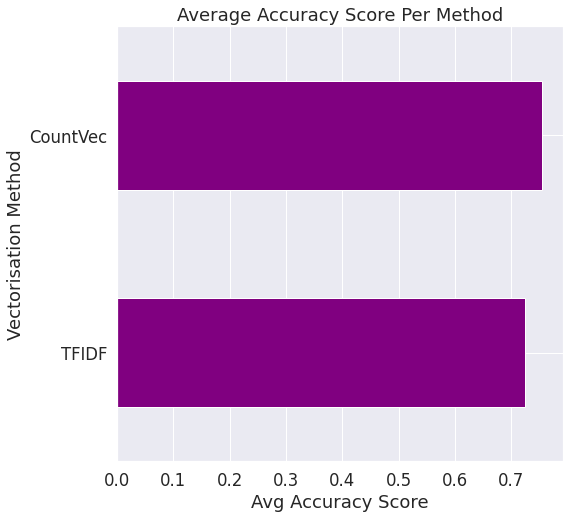

In [52]:
accuracy_dict = {'TFIDF':[tfidf_avg_accuracy], 'CountVec':[CountVec]}
accuracy_df = pd.DataFrame(accuracy_dict)
accuracy_df.T.plot(kind='barh', figsize = (8,8),legend = False, color = ['purple'])
plt.xlabel('Avg Accuracy Score')
plt.ylabel('Vectorisation Method')
plt.yticks(rotation = 360)
plt.title('Average Accuracy Score Per Method')
plt.show()

We used both count vectorizer and tfidf vectorizer to see which one performs better. From the plot above we can see that Count Vectorisation has on average higher acurracy scores compared to tfidf vectorisation. Therefore, we will
be using the count vectorisation method pipeline for our final validation tests.

#### Making validations set predicions

In [53]:
tree_prediction = tree_count.predict(X_val) # DecisionTreeClassifier predictions
rfc_prediction = rfc_count.predict(X_val) # RandomForestClassifier predictions
Lsvc_prediction = Lsvc_count.predict(X_val) # LinearSVClassifier Predictions
logreg_prediction = logreg_count.predict(X_val) # Logistic regression predictions
SGD_prediction = SGD_count.predict(X_val) # SGD Classifier predictions
SVC_prediction = svc_count.predict(X_val) # Support vector machine predictions
ridge_prediction = ridge_count.predict(X_val) # Ridge predictions

#### LinearSVClassifier Scores

In [54]:
linearSVC_acc = round(accuracy_score(y_val, Lsvc_prediction),4)
print(f'\nOverall accuracy score for LinearSVC Model : {linearSVC_acc}')
linearSVC_f1 = round(f1_score(y_val, Lsvc_prediction, average="weighted"),4)
print(f'\nWeighted avg f1 score for LinearSVC Model : {linearSVC_f1}')


Overall accuracy score for LinearSVC Model : 0.7882

Weighted avg f1 score for LinearSVC Model : 0.7828


#### Ridge Classifier Scores

In [55]:
ridge_acc = round(accuracy_score(y_val, ridge_prediction),4)
print(f'\nRidge Classifier accuracy Score : {ridge_acc}')
ridge_f1 = round(f1_score(y_val, ridge_prediction, average="weighted"),4)
print(f'\nRidge Classifier weighted avg f1 score : {ridge_f1}')


Ridge Classifier accuracy Score : 0.78

Ridge Classifier weighted avg f1 score : 0.7726


#### Support vector machine scores

In [56]:
svc_acc = round(accuracy_score(y_val, SVC_prediction),4)
print(f'\nSupport Vector Classifier accuracy Score : {svc_acc}')
svc_f1 = round(f1_score(y_val, SVC_prediction, average="weighted"),4)
print(f'\nSupport Vector Classifier weighted avg f1 score : {svc_f1}')


Support Vector Classifier accuracy Score : 0.7459

Support Vector Classifier weighted avg f1 score : 0.7284


#### SGD Classifier scores

In [57]:
sgd_acc = round(accuracy_score(y_val, SGD_prediction),4)
print('\nSGD Classifier accuracy Score :\n', sgd_acc)
sgd_f1 = round(f1_score(y_val, SGD_prediction, average="weighted"),4)
print('\nSGD weighted avg f1_score :\n', sgd_f1)


SGD Classifier accuracy Score :
 0.7781

SGD weighted avg f1_score :
 0.7708


#### Logistic regression scores

In [58]:
logistic_reg_acc = round(accuracy_score(y_val, logreg_prediction),4)
print('\nLogistic Regression accuracy Score\n', logistic_reg_acc)
logistic_reg_f1 = round(f1_score(y_val, logreg_prediction, average="weighted"),4)
print('\nLogistic Regression weighted f1 score\n', logistic_reg_f1)



Logistic Regression accuracy Score
 0.7857

Logistic Regression weighted f1 score
 0.7782


#### DecisionTreeClassifier scores

In [59]:
decison_tree_acc = round(accuracy_score(y_val, tree_prediction),4)
print(f'\nOverall accuracy score for Decision Tree : {decison_tree_acc}')
decision_tree_f1 = round(f1_score(y_val, tree_prediction, average="weighted"),4)
print(f'\nWeighted avg f1 score Decision Tree {decision_tree_f1}' )



Overall accuracy score for Decision Tree : 0.6669

Weighted avg f1 score Decision Tree 0.6596


#### RandomForestClassifier scores

In [60]:
random_forest_acc = round(accuracy_score(y_val, rfc_prediction),4)
print(f'\nOveral accuracy score for RandomForestClassifier :{random_forest_acc}')
random_forest_f1 = round(f1_score(y_val, rfc_prediction, average="weighted"),4)
print(f'\nWeighted f1 score for RandomForestClassifier : {random_forest_f1}')


Overal accuracy score for RandomForestClassifier :0.7339

Weighted f1 score for RandomForestClassifier : 0.7015


### Creating a dataframe with our models and their performances metrics

In [61]:

classifier_scores = {'Classifiers':['Decision Tree', 'Random Forest','LinearSVC',
                                    'Logistic Regression','Stochastic Gradient Descent',
                                    'Support Vector Classifier','Ridge Classifier'],
                    'Accuracy':[decison_tree_acc,random_forest_acc,
                                linearSVC_acc,logistic_reg_acc, sgd_acc, svc_f1, ridge_acc],
                     'Weighted avg f1 Score':[decision_tree_f1,random_forest_f1,
                                       linearSVC_f1,logistic_reg_f1, sgd_f1, svc_f1, ridge_f1]}
df= pd.DataFrame(classifier_scores)
df.sort_values(by=['Accuracy'],ascending=True, inplace = True)
df

,Classifiers,Accuracy,Weighted avg f1 Score
0,Decision Tree,0.6669,0.6596
5,Support Vector Classifier,0.7284,0.7284
1,Random Forest,0.7339,0.7015
4,Stochastic Gradient Descent,0.7781,0.7708
6,Ridge Classifier,0.7800,0.7726
3,Logistic Regression,0.7857,0.7782
2,LinearSVC,0.7882,0.7828


### 7. Model performance

Form the table above  we can see that linearSVC perfromed best with accuracy 79% and f1-score 78% followed by logistic regression  also with accuracy 79% and f1-score 78%. Decision tree performed least with accuracy 66% and f1-score 66%. We now choose the 4 best performing models to further improve their performance.

### making predictions

### 8. Hyperparameter tuning

We will do hyperparameter tunning on logistcs regression and ridge regression to see if we can improve the performace. Hyperparameters control the overall behavior of a machine learning model and are tunned to get the best fit.

In [62]:
# We have to to prepare our data again since we wont be using the pipelines

train = train_df.copy()
test = test_df.copy()

train['message'] = replace_sentiments(train)
test['message'] = replace_sentiments(test)
train['clean_tweets'] = clean_tweets(train)
test['clean_tweets'] = clean_tweets(test)

normalizer = WordNetLemmatizer()
train['clean_tweets'] = train['clean_tweets'].apply(lambda x: [normalizer.lemmatize(token, POS(token)) for token in x])
test['clean_tweets'] = test['clean_tweets'].apply(lambda x: [normalizer.lemmatize(token, POS(token)) for token in x])



X = train['clean_tweets']
y = train['sentiment']
X_test = test['clean_tweets']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state = 42)

X_train = list(X_train.apply(' '.join))
X_val = list(X_val.apply(' '.join))
X_test = list(X_test.apply(' '.join))

In [63]:
vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None, 
                             preprocessor = None, 
                             stop_words = None, 
                             max_features = 180000,
                             min_df = 1,
                             ngram_range = (1,2)
                            )
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

### Logistics Regession

In [64]:
# defining parameter range
'''parameters = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}
logreg = LogisticRegression()
logreg_grid = GridSearchCV(logreg,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10)                     # number of folds
logreg_grid.fit(X_train,y_train)
print("Tuned Hyperparameters :", logreg_grid.best_params_)
print("Accuracy :",logreg_grid.best_score_)'''

best_params= {'C': 1000.0, 'penalty': 'l2', 'solver': 'lbfgs'}
# retrain the model with best params
logreg = LogisticRegression(C=1000.0,penalty= 'l2',solver= 'lbfgs')
logreg.fit(X_train, y_train)

LogisticRegression(C=1000.0)

In [65]:
#print classification report
print('classfication report',classification_report(y_val, logreg.predict(X_val)))

classfication report               precision    recall  f1-score   support

          -1       0.97      1.00      0.99       844
           0       0.92      0.98      0.95       837
           1       0.97      0.83      0.89       854
           2       0.93      0.97      0.95       877

    accuracy                           0.95      3412
   macro avg       0.95      0.95      0.94      3412
weighted avg       0.95      0.95      0.94      3412



### Ridge Regression

In [66]:
# Tunning Ridge Classifier using GridSearchCV

# The hyperprarameter gridsearch for the logistic regression model is purposefully commented out because 
# it perfoms 5 folds for each of the 50 candidates totalling in 250 fits, this GridSearch  code took 57 minutes to complete
#  we have saved the resulting model as a pickle file

'''
param_grid = {'alpha':np.logspace(-4, 4, 50)}
grid = GridSearchCV(RidgeClassifier(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)
print(accuracy_score(y_val, grid.predict(X_val)))
'''
best_params = {'alpha': 11.513953993264458}
# retrain the model with best params
ridge_grid = RidgeClassifier(alpha=11.513953993264458)
ridge_grid.fit(X_train, y_train)

RidgeClassifier(alpha=11.513953993264458)

In [67]:
# accuracy of the ridge gridsearch model
print(f1_score(y_val, ridge_grid.predict(X_val), average = 'weighted'))

0.9338976411631323


In [68]:
# retraining the best Ridge Classifer model we have
ridge_tuned = RidgeClassifier(alpha=5.428675439323859, class_weight=None, copy_X=True,
                fit_intercept=True, max_iter=None, normalize=False,
                random_state=None, solver='auto', tol=0.001) 
ridge_tuned.fit(X_train, y_train)

RidgeClassifier(alpha=5.428675439323859, normalize=False)

In [69]:
# Checking the accuracy score
ridge_prediction_tuned =ridge_tuned.predict(X_val)

ridge_acc_2 = round(accuracy_score(y_val, ridge_prediction_tuned),4)
print(f'\nOverall accuracy score for Ridge Classifier accuracy Score : {ridge_acc}')
ridge_f1_2 = round(f1_score(y_val, ridge_prediction_tuned, average="weighted"),4)
print(f'\nWeighted avg f1 score for Ridge Classifier : {ridge_f1}')


Overall accuracy score for Ridge Classifier accuracy Score : 0.78

Weighted avg f1 score for Ridge Classifier : 0.7726


In [70]:
# Saving the model
import pickle
model_save_path = 'Ridgeclfr.pkl'
with open(model_save_path, 'wb') as file:
  pickle.dump(ridge_tuned, file)

In [71]:
print('classfication report for our best model\n',classification_report(y_val, ridge_tuned.predict(X_val)))

classfication report for our best model
               precision    recall  f1-score   support

          -1       0.97      0.99      0.98       844
           0       0.92      0.98      0.95       837
           1       0.95      0.80      0.87       854
           2       0.92      0.97      0.94       877

    accuracy                           0.94      3412
   macro avg       0.94      0.94      0.94      3412
weighted avg       0.94      0.94      0.94      3412



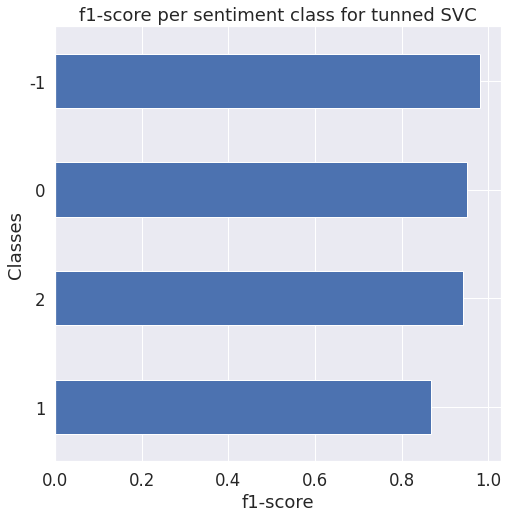

In [72]:
# # Visual represetation of of the f1 score for each class
report_ridge = classification_report(y_val, ridge_prediction_tuned, output_dict=True)
df_ridge = pd.DataFrame(report_ridge).transpose()
df_ridge.drop(['accuracy'], inplace = True)
df_ridge.sort_values(by=['f1-score'],ascending=True, inplace = True)
df_ridge.drop(['weighted avg','macro avg'])['f1-score'].plot(kind='barh', figsize = (8,8))
plt.xlabel('f1-score')
plt.ylabel('Classes')
#plt.yticks(rotation = 40)
plt.title('f1-score per sentiment class for tunned SVC')
plt.show()

In [74]:
y_pred4 = ridge_tuned.predict(X_test)
print(y_pred4)

[2 0 1 ... 0 0 1]


In [75]:
test_df['sentiment'] = y_pred4

In [76]:
test_df[['tweetid','sentiment']].to_csv('Ridge Submission.csv', index=False)

In [77]:
test_df[['tweetid','sentiment']]

,tweetid,sentiment
0,169760,2
1,35326,0
2,224985,1
3,476263,1
4,872928,0
...,...,...
10541,895714,0
10542,875167,1
10543,78329,0
10544,867455,0


### 9. Conclusion 




In [78]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/rinae-d/general/79abaf0551494f8b8fe14ab2b9534c4d
COMET INFO:   Others:
COMET INFO:     notebook_url : https://colab.research.google.com/notebook#fileId=https%3A%2F%2Fgithub.com%2FRinae-D%2Fclassification-predict-streamlit-template%2Fblob%2Fmaster%2FStarter_notebook.ipynb
COMET INFO:   Parameters:
COMET INFO:     C                              : 1.0
COMET INFO:     CountVec                       : CountVectorizer(max_features=180000, ngram_range=(1, 2))
COMET INFO:     CountVec__analyzer             : word
COMET INFO:     CountVec__binary               : False
COMET INFO:     CountVec__decode_error         : strict
COMET INFO:     CountVec__dtype                : <class 'numpy.int64'>
COMET INFO:     CountVec__encoding             : utf-8
COMET INF